In [1]:
import warnings
warnings.filterwarnings('ignore')
import keras
import tensorflow as tf
import tensorflow.keras as k
from tensorflow.keras.layers import Embedding
import numpy as np
from imblearn.datasets import make_imbalance
from collections import Counter

Using TensorFlow backend.


In [19]:
import scipy.io as spio

from sklearn import preprocessing

import numpy as np
X_train, y_train, X_test, y_test, X_dev, y_dev= np.load('//home/amrgaballah/Desktop/a/anger_and_sad_only.npy', allow_pickle = True)
print(X_train.dtype)
print(X_train.shape)
print(X_test.shape)
print(X_dev.shape)
print(y_test)

float64
(1792, 768)
(553, 768)
(264, 768)
[[1 0]
 [0 1]
 [1 0]
 ...
 [1 0]
 [1 0]
 [1 0]]


In [3]:
# from sklearn import preprocessing

# min_max_scaler = preprocessing.StandardScaler()
X_train = np.float32(X_train)
X_test = np.float32(X_test)
X_dev = np.float32(X_dev)
print(X_train.dtype)

In [4]:
print(X_train[4,:])

[-6.47806764e-01  4.17328060e-01  9.99771893e-01 -9.93111432e-01
  9.65131402e-01  8.38728249e-01  9.86115217e-01 -9.81538355e-01
 -9.62402821e-01 -6.91023946e-01  9.74688768e-01  9.98278379e-01
 -9.97152209e-01 -9.99737799e-01  7.43430912e-01 -9.78138268e-01
  9.81952131e-01 -4.89345670e-01 -9.99942720e-01 -8.53503883e-01
 -4.62788880e-01 -9.99802053e-01  2.90580809e-01  9.62150037e-01
  9.75405812e-01 -2.17174366e-02  9.82745051e-01  9.99952972e-01
  8.31544995e-01  5.58376536e-02  2.86491871e-01 -9.85395908e-01
  7.52935290e-01 -9.98257101e-01  1.87289327e-01  1.50550008e-01
  4.98135239e-01 -1.77381530e-01  8.09455991e-01 -9.51167941e-01
 -7.08367586e-01 -7.90426731e-01  6.89730167e-01 -4.77898329e-01
  7.10985482e-01  2.81741798e-01  1.95091844e-01 -6.18837476e-02
 -8.79066810e-02  9.99736488e-01 -9.67896700e-01  9.99110162e-01
 -9.88707900e-01  9.96922851e-01  9.96133983e-01  1.46470293e-01
  9.94752824e-01  1.55680940e-01 -9.97308016e-01  2.84832925e-01
  9.51500893e-01  2.19786

In [5]:
# print(Counter(y_train))
# X_res, y_res = make_imbalance(X_train, y_train, sampling_strategy={0: 10, 1: 20, 2: 30}, random_state=42)
# print(Counter(y_res))

In [6]:
num_classes = 2
# # convert class vectors to binary class matrices
# y_train = keras.utils.to_categorical(y_train, num_classes)
# y_test = keras.utils.to_categorical(y_test, num_classes)
# y_dev = keras.utils.to_categorical(y_dev, num_classes)

In [7]:
print(y_train.shape)

(1792, 2)


In [8]:
timestep = 20

tmp_train = np.reshape(X_train[0], (1, len(X_train[0])))
print(tmp_train.shape)
tmp_train = np.repeat(tmp_train, timestep, axis=0)
print(tmp_train.shape)
print(len(tmp_train[0]))
print(len(tmp_train[:,:]))
ab = np.reshape(tmp_train, (1, len(tmp_train[:,:]), len(tmp_train[0])))
print(ab.shape)
print(X_train.shape[0])
X_train = np.repeat( ab, X_train.shape[0], axis=0)
print(X_train.shape)

(1, 768)
(20, 768)
768
20
(1, 20, 768)
1792
(1792, 20, 768)


In [9]:
timestep = 20

tmp_test = np.reshape(X_test[0], (1, len(X_test[0])))
print(tmp_test.shape)
tmp_test = np.repeat(tmp_test, timestep, axis=0)
print(tmp_test.shape)
print(len(tmp_test[0]))
print(len(tmp_test[:,:]))
abc = np.reshape(tmp_test, (1, len(tmp_test[:,:]), len(tmp_test[0])))
print(abc.shape)
X_test = np.repeat( abc, X_test.shape[0], axis=0)
print(X_test.shape)

(1, 768)
(20, 768)
768
20
(1, 20, 768)
(553, 20, 768)


In [10]:
timestep = 20

tmp_dev = np.reshape(X_dev[0], (1, len(X_dev[0])))
print(tmp_dev.shape)
tmp_dev = np.repeat(tmp_dev, timestep, axis=0)
print(tmp_dev.shape)
print(len(tmp_dev[0]))
print(len(tmp_dev[:,:]))
abc = np.reshape(tmp_dev, (1, len(tmp_dev[:,:]), len(tmp_dev[0])))
print(abc.shape)
X_dev = np.repeat( abc, X_dev.shape[0], axis=0)
print(X_dev.shape)

(1, 768)
(20, 768)
768
20
(1, 20, 768)
(264, 20, 768)


In [11]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, LSTM, Bidirectional, Input
from tensorflow.keras.optimizers import RMSprop, SGD, Adam

In [12]:

timestep = 20

model = k.Sequential()
model.add(LSTM(64, input_shape=(timestep, 768), return_sequences=True))
model.add(Dropout(0.1))
model.add(LSTM(32))
model.add(Dropout(0.1))
model.add(Activation('sigmoid'))
model.add(Dense(2))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
rms = RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0)
Adam1 = Adam(lr=0.01)
model.compile(loss='binary_crossentropy',
              optimizer=Adam1,
              metrics=['accuracy'])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 64)            213248    
_________________________________________________________________
dropout (Dropout)            (None, 20, 64)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
activation (Activation)      (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 66        
Total params: 225,730
Trainable params: 2

In [13]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=50)
hist = model.fit(X_train, y_train, validation_data = (X_dev, y_dev), verbose=1, nb_epoch=100, batch_size=256, shuffle=False, callbacks=[early_stopping])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1792 samples, validate on 264 samples
Epoch 1/100
1792/1792 [==============================] - 3s 2ms/sample - loss: 0.7387 - acc: 0.5619 - val_loss: 0.6810 - val_acc: 0.5795
Epoch 2/100
1792/1792 [==============================] - 1s 458us/sample - loss: 0.6731 - acc: 0.6172 - val_loss: 0.6903 - val_acc: 0.5795
Epoch 3/100
1792/1792 [==============================] - 1s 612us/sample - loss: 0.6669 - acc: 0.6183 - val_loss: 0.6807 - val_acc: 0.5795
Epoch 4/100
1792/1792 [==============================] - 1s 452us/sample - loss: 0.6674 - acc: 0.6186 - val_loss: 0.6860 - val_acc: 0.5795
Epoch 5/100
1792/1792 [==============================] - 1s 509us/sample - loss: 0.6667 - acc: 0.6189 - val_loss: 0.6815 - val_acc: 0.5795
Epoch 6/100
1792/1792 [==============================] - 1s 442us/sample - loss: 0.6668 - acc: 0.6189 - val_loss: 0.6840 - val_acc: 0.5795
Epoch 7/100
1792/1792 [====

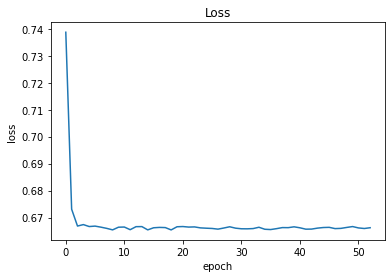

In [14]:
import matplotlib.pyplot as plt

plt.figure()
# plt.subplot(1, 2, 1)
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [15]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6625610619082805
Test accuracy: 0.6238698


In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
class_names = ['Angry', 'Sad']


y_pred = model.predict(X_test)

y_pred = (y_pred > 0.5)
accuracy_score(y_test, y_pred, normalize=False)
print(classification_report(y_test, y_pred, target_names=class_names, digits=4))

              precision    recall  f1-score   support

       Angry     0.6239    1.0000    0.7684       345
         Sad     0.0000    0.0000    0.0000       208

   micro avg     0.6239    0.6239    0.6239       553
   macro avg     0.3119    0.5000    0.3842       553
weighted avg     0.3892    0.6239    0.4794       553
 samples avg     0.6239    0.6239    0.6239       553



In [17]:
from sklearn.metrics import confusion_matrix
#Get the confusion matrix


#array([[1, 0, 0],
#   [1, 0, 0],
#   [0, 1, 2]])
cm =confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
#Now the normalize the diagonal entries
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#array([[1.        , 0.        , 0.        ],
#      [1.        , 0.        , 0.        ],
#      [0.        , 0.33333333, 0.66666667]])

#The diagonal entries are the accuracies of each class
cm.diagonal()

array([1., 0.])